<a href="https://colab.research.google.com/github/WilliamJWen/Project42/blob/main/colab_notebooks/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project42: AI generated Image Detector**



# Data Preprocessing

In [4]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project 42

/content/drive/.shortcut-targets-by-id/10mb1gPJLJgRacbxehHwFsW4qyNo6j-JS/Project 42


In [ ]:
ls

 ChameleonDataset/  'Ethical Considerations.gdoc'  'Untitled Diagram.drawio'
 Chameleon.zip       processedChameleon/


### Preprocess Chameleon Dataset
- step 1: half of the real images (75-20-5)
- step 2: half of the real images (70-20-5) and same amount of the fake images (75-20-5)

In [ ]:
# #######################################
# #### NO NEED TO RUN THIS PART AGAIN ####
# ########################################

# import zipfile

# zip_path = '/content/drive/MyDrive/Project 42/Chameleon.zip'
# extract_to = '/content/destination_folder'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)


In [ ]:
# #######################################
# #### NO NEED TO RUN THIS PART AGAIN ####
# ########################################

# import os
# import random
# import shutil
# from math import floor

# # -----------------------------
# # 1. Define Paths
# # -----------------------------
# # Path to the original dataset containing:
# #   - "1_real"
# #   - "2_fake"
# dataset_dir = "/content/destination_folder/Chameleon/test"  # CHANGE to your dataset location

# # Output directories for each step
# output_step1 = "/content/drive/MyDrive/Project 42/processedChameleon/step1"  # for step 1 (real only)
# output_step2 = "/content/drive/MyDrive/Project 42/processedChameleon/step2"  # for step 2 (real + fake)

# # Directories of real and fake images
# real_dir = os.path.join(dataset_dir, "0_real")
# fake_dir = os.path.join(dataset_dir, "1_fake")

# # -----------------------------
# # 2. Gather Image File Paths
# # -----------------------------
# valid_exts = (".jpg", ".jpeg", ".png", ".bmp", ".tiff")

# real_images = [os.path.join(real_dir, f) for f in os.listdir(real_dir)
#                if f.lower().endswith(valid_exts)]
# fake_images = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir)
#                if f.lower().endswith(valid_exts)]

# # Shuffle images to randomize splits
# random.shuffle(real_images)
# random.shuffle(fake_images)

# print(f"Found {len(real_images)} real images.")
# print(f"Found {len(fake_images)} fake images.")

# # -----------------------------
# # 3. Split Real Images into Two Halves
# # -----------------------------
# half_real_count = len(real_images) // 2
# real_half_1 = real_images[:half_real_count]  # for step 1
# real_half_2 = real_images[half_real_count:]  # for step 2

# # -----------------------------
# # 4. Define Splitting Functions
# # -----------------------------
# def split_75_20_5(image_list):
#     """
#     Splits a list of images into 75% train, 20% val, and 5% test.
#     """
#     total = len(image_list)
#     train_end = floor(total * 0.75)
#     val_end = floor(total * 0.95)  # 75% + 20% = 95%
#     train = image_list[:train_end]
#     val = image_list[train_end:val_end]
#     test = image_list[val_end:]
#     return train, val, test

# def split_exact(image_list):
#     """
#     Splits a list into exactly 75% train, 20% val, 5% test.
#     """
#     total = len(image_list)
#     train_end = floor(total * 0.75)
#     val_end = floor(total * 0.95)
#     train = image_list[:train_end]
#     val = image_list[train_end:val_end]
#     test = image_list[val_end:]
#     return train, val, test

# # -----------------------------
# # 5. Create Step 1 Splits (Real Only)
# # -----------------------------
# train_real_1, val_real_1, test_real_1 = split_75_20_5(real_half_1)

# # -----------------------------
# # 6. Create Step 2 Splits (Balanced Real + Fake)
# # -----------------------------
# # Ensure that we have an equal number of fake images to match real_half_2
# required_fake = len(real_half_2)
# if required_fake > len(fake_images):
#     raise ValueError("Not enough fake images to match the second half of real images.")

# # Use as many fake images as needed
# fake_for_step2 = fake_images[:required_fake]

# # Shuffle before splitting each class separately
# random.shuffle(real_half_2)
# random.shuffle(fake_for_step2)

# # Split each class individually
# train_real_2, val_real_2, test_real_2 = split_exact(real_half_2)
# train_fake,    val_fake,    test_fake    = split_exact(fake_for_step2)

# # Combine corresponding splits to ensure balance in each subset
# train_step2 = [(path, "real") for path in train_real_2] + [(path, "fake") for path in train_fake]
# val_step2   = [(path, "real") for path in val_real_2]   + [(path, "fake") for path in val_fake]
# test_step2  = [(path, "real") for path in test_real_2]  + [(path, "fake") for path in test_fake]

# # Shuffle the combined splits
# random.shuffle(train_step2)
# random.shuffle(val_step2)
# random.shuffle(test_step2)

# # -----------------------------
# # 7. Copy Files to Output Folders
# # -----------------------------
# def copy_files(file_list, output_dir, is_tuple=False):
#     """
#     Copies files to output_dir under subdirectories for each class.
#     If is_tuple is True, each item is a (filepath, label) tuple.
#     Otherwise, all files are assumed to be 'real'.
#     """
#     for item in file_list:
#         if is_tuple:
#             file_path, label = item
#         else:
#             file_path = item
#             label = "real"
#         dest_folder = os.path.join(output_dir, label)
#         os.makedirs(dest_folder, exist_ok=True)
#         file_name = os.path.basename(file_path)
#         shutil.copy2(file_path, os.path.join(dest_folder, file_name))

# # --- For Step 1 (real only) ---
# for split, files in zip(["train", "val", "test"], [train_real_1, val_real_1, test_real_1]):
#     out_dir = os.path.join(output_step1, split)
#     os.makedirs(out_dir, exist_ok=True)
#     copy_files(files, out_dir, is_tuple=False)

# # --- For Step 2 (balanced real and fake) ---
# for split, files in zip(["train", "val", "test"], [train_step2, val_step2, test_step2]):
#     out_dir = os.path.join(output_step2, split)
#     os.makedirs(out_dir, exist_ok=True)
#     copy_files(files, out_dir, is_tuple=True)

# print("Data successfully split and copied!")


Found 14863 real images.
Found 11170 fake images.
Data successfully split and copied!


Processed Data is at `/content/drive/MyDrive/Project\ 42/processedChameleon` now.

In [ ]:
!ls -1 /content/drive/MyDrive/Project\ 42/processedChameleon/step2/train/real | wc -l


5574


In [ ]:
import os
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# set seed
torch.random.manual_seed(42)


# Define base path to processedChameleon
base_dir = "/content/drive/MyDrive/Project 42/processedChameleon"
step2_dir = os.path.join(base_dir, "step2")

# Define directories for each split
train_dir = os.path.join(step2_dir, "train")
val_dir   = os.path.join(step2_dir, "val")
test_dir  = os.path.join(step2_dir, "test")

# Define image transforms
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Load datasets using ImageFolder
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset   = ImageFolder(root=val_dir, transform=transform)
test_dataset  = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Step 2 Train classes:", train_dataset.classes)
print("Step 2 Train samples:", len(train_dataset))
print("Step 2 Validation samples:", len(val_dataset))
print("Step 2 Test samples:", len(test_dataset))


Step 2 Train classes: ['fake', 'real']
Step 2 Train samples: 11148
Step 2 Validation samples: 2972
Step 2 Test samples: 744


In [7]:
!cp -r /content/drive/MyDrive/Project\ 42/processedChameleon /content/

^C


In [14]:
import os
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, random_split


def get_data_loaders(step, batch_size=64):
  torch.random.manual_seed(42)

  # Define base path to processedChameleon
  base_dir = "/content/drive/MyDrive/Project 42/processedChameleon"
  step_dir = os.path.join(base_dir, "step" + str(step))

  # Define directories for each split
  train_dir = os.path.join(step_dir, "train")
  val_dir   = os.path.join(step_dir, "val")
  test_dir  = os.path.join(step_dir, "test")

  # Define image transforms
  transform = transforms.Compose([
      transforms.RandomResizedCrop((256, 256)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
  ])

  # Load datasets using ImageFolder
  train_dataset = ImageFolder(root=train_dir, transform=transform)
  val_dataset   = ImageFolder(root=val_dir, transform=transform)
  test_dataset  = ImageFolder(root=test_dir, transform=transform)

  train_loader = DataLoader(train_dataset,
                            batch_size=batch_size,
                            shuffle=True,
                            num_workers=8,
                            pin_memory=True,
                            persistent_workers=True)
  val_loader   = DataLoader(val_dataset,
                            batch_size=batch_size,
                            shuffle=False,
                            num_workers=8,
                            pin_memory=True,
                            persistent_workers=True)
  test_loader  = DataLoader(test_dataset,
                            batch_size=batch_size,
                            shuffle=False,
                            num_workers=8,
                            pin_memory=True,
                            persistent_workers=True)

  return train_loader, val_loader, test_loader


def get_small_batch(step, size):
  # Get path to training data
  base_dir = "/content/drive/MyDrive/Project 42/processedChameleon"
  step_dir = os.path.join(base_dir, "step" + str(step))
  train_dir = os.path.join(step_dir, "train")

  # Define image transforms
  transform = transforms.Compose([
      transforms.RandomResizedCrop((256, 256)),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
  ])

  # Create dataloader
  data = ImageFolder(root=train_dir, transform=transform)
  batch, _ = random_split(data,
                          lengths=[size, len(data) - size],
                          generator=torch.Generator().manual_seed(42))

  return batch


# Baseline Model

## Architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Baseline(nn.Module):
  def __init__(self):
    super(Baseline, self).__init__()

    # Hidden layer activation
    self.activation = F.relu

    # Pooling
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 2w x 2h -> w x h
    self.avgpool4 = nn.AvgPool2d(kernel_size=4, stride=4) # 4w x 4h -> w x h

    # Convolutional layers
    self.conv1 = nn.Conv2d(in_channels=3,
                           out_channels=64,
                           kernel_size=7,
                           padding=3,
                           stride=2)
    self.conv2 = nn.Conv2d(in_channels=64,
                           out_channels=64,
                           kernel_size=3,
                           padding=1,
                           stride=1)
    self.conv3 = nn.Conv2d(in_channels=64,
                           out_channels=64,
                           kernel_size=3,
                           padding=1,
                           stride=1)
    self.conv4 = nn.Conv2d(in_channels=64,
                           out_channels=128,
                           kernel_size=3,
                           padding=1,
                           stride=2)
    self.conv5 = nn.Conv2d(in_channels=128,
                           out_channels=128,
                           kernel_size=3,
                           padding=1,
                           stride=1)
    self.conv6 = nn.Conv2d(in_channels=128,
                           out_channels=256,
                           kernel_size=3,
                           padding=1,
                           stride=2)
    self.conv7 = nn.Conv2d(in_channels=256,
                           out_channels=256,
                           kernel_size=3,
                           padding=1,
                           stride=1)

    # FC layer
    self.fc = nn.Linear(256 * 4 * 4, 1)

    # Batch normalization
    self.norm64 = nn.BatchNorm2d(num_features=64)
    self.norm128 = nn.BatchNorm2d(num_features=128)
    self.norm256 = nn.BatchNorm2d(num_features=256)


  def downsample2(self, x, out_channels):
    N, C, H, W = x.shape # Assume H == W

    # Downsample by 2
    downsample = nn.AvgPool2d(2, 2)
    x = downsample(x)

    # 0 padding new channels
    new_channels = out_channels - C
    x = F.pad(x, pad=(0, 0, 0, 0, 0, new_channels))

    return x


  def forward(self, x):
    # Layer 1
    x = self.conv1(x)                                       # Output: 64x128x128
    x = self.norm64(self.activation(self.maxpool2(x)))      # Output: 64x64x64

    # Layer 2
    skip = x.detach().clone()
    x = self.norm64(self.activation(self.conv2(x)))         # Output: 64x64x64

    # Layer 3
    x = self.norm64(self.activation(skip + self.conv3(x)))  # Output: 64x64x64

    # Layer 4
    skip = x.detach().clone()
    x = self.norm128(self.conv4(x))                         # Output: 128x32x32

    # Layer 5
    x = self.norm128(self.activation(self.downsample2(skip, 128)
                                      + self.conv5(x)))     # Output: 128x32x32

    # Layer 6
    skip = x.detach().clone()
    x = self.norm256(self.activation(self.conv6(x)))        # Output: 256x16x16

    # Layer 7
    x = self.downsample2(skip, 256) + self.conv7(x)         # Output: 256x16x16
    x = self.norm256(self.activation(self.avgpool4(x)))     # Output: 256x4x4

    # Layer 8
    x = x.view(-1, 256 * 4 * 4)
    x = self.fc(x)
    x = x.squeeze(1)

    return x


baseline_model = Baseline()
num_params = 0
for param in baseline_model.parameters():
    num_params += param.numel()
print("There are", num_params, "parameters in the baseline model")


There are 1195009 parameters in the baseline model


## Training

### Functions

In [ ]:
import matplotlib.pyplot as plt
import torch


# Plot training curve from model path
def plot_training_curve(path):
  train_err = np.loadtxt("{}_train_err.csv".format(path))
  val_err = np.loadtxt("{}_val_err.csv".format(path))
  train_loss = np.loadtxt("{}_train_loss.csv".format(path))
  val_loss = np.loadtxt("{}_val_loss.csv".format(path))
  plt.title("Train vs Validation Error")
  n = len(train_err) # number of epochs
  plt.plot(range(1, n + 1), train_err, label="Train")
  plt.plot(range(1, n + 1), val_err, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.legend(loc='best')
  plt.show()
  plt.title("Train vs Validation Loss")
  plt.plot(range(1, n + 1), train_loss, label="Train")
  plt.plot(range(1, n + 1), val_loss, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.show()


In [ ]:
import numpy as np
import time
import torch.optim as optim
from torch.utils.data import DataLoader


# Path that I (Nathan) use to save files; replace with your own folder if you
# want to run
NATHAN_PATH = '/content/drive/MyDrive/APS360_misc/'


# Get name of baseline model checkpoint
def get_baseline_name(epoch):
  path = NATHAN_PATH + "model_baseline_epoch{0}".format(epoch)
  return path


# Evaluate data from loader on net
def evaluate_baseline(net, loader):
  if loader == None:
    return None, None

  # Enable GPU usage
  if torch.cuda.is_available():
    net = net.cuda()

  total_loss = 0.0
  total_err = 0.0
  num_samples = 0

  criterion = nn.BCEWithLogitsLoss()

  for i, data in enumerate(loader):
    imgs, labels = data
    num_samples += len(labels)

    # Enable GPU usage
    if torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()

    # Forward pass
    outputs = net(imgs)
    loss = criterion(outputs, labels.float())

    # Update loss, error
    corr = (outputs > 0.0).squeeze().long() != labels
    total_err += int(corr.sum())
    total_loss += loss.item()

  err = float(total_err) / num_samples
  loss = float(total_loss) / len(loader)

  return err, loss


# Train baseline model on given datasets
def train_baseline(net,
                   custom_train=None,
                   num_epochs=17):
  torch.manual_seed(42)

  # Note: we want to train over 3000 iterations. For now, I assume a batch size
  # of 11148, meaning there will be 175 iterations/per epoch, so I am using 17
  # epochs.

  # Enable GPU usage
  if torch.cuda.is_available():
    net = net.cuda()

  # Hyperparameters
  batch_size = 64
  learning_rate = 0.01

  # Criterion
  criterion = nn.BCEWithLogitsLoss()

  # Optimizer
  betas = (0.9, 0.99)
  optimizer = optim.Adam(net.parameters(),
                         lr=learning_rate,
                         betas=betas)

  # Arrays to record loss and error
  train_err = np.zeros(num_epochs)
  train_loss = np.zeros(num_epochs)
  val_err = np.zeros(num_epochs)
  val_loss = np.zeros(num_epochs)

  # Load data
  train_loader, val_loader, _ = get_data_loaders(step=2, batch_size=batch_size)
  if custom_train:
    train_loader = DataLoader(custom_train, batch_size, shuffle=True)
    val_loader = None

  # Train
  start_time = time.time()
  for epoch in range(num_epochs):
    total_train_loss = 0.0
    total_train_err = 0.0
    num_samples = 0

    # Iterate through mini batches
    for i, data in enumerate(train_loader):
      imgs, labels = data
      num_samples += len(labels)

      # Enable GPU usage
      if torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()

      # Forward pass, backward pass, update
      optimizer.zero_grad()
      outputs = net(imgs)
      loss = criterion(outputs, labels.float())
      loss.backward()
      optimizer.step()

      # Update training loss, error
      corr = (outputs > 0.0).squeeze().long() != labels
      total_train_err += int(corr.sum())
      total_train_loss += loss.item()

    # Calculate total loss, error
    train_err[epoch] = total_train_err / num_samples
    train_loss[epoch] = total_train_loss / len(train_loader)
    val_err[epoch], val_loss[epoch] = evaluate_baseline(net, val_loader)

    # Print loss, error
    print(("Epoch {}: Train err: {}, Train loss: {} | " +
           "Validation err: {}, Validation loss: {}").format(
              epoch + 1,
              train_err[epoch],
              train_loss[epoch],
              val_err[epoch],
              val_loss[epoch]))

    # Save the current model (checkpoint) to a file
    model_path = get_baseline_name(epoch + 1)
    torch.save(net.state_dict(), model_path)

  # Finish up
  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

  # Write the train/test loss/err into CSV file for plotting later
  np.savetxt("{}_train_err.csv".format(model_path), train_err)
  np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
  np.savetxt("{}_val_err.csv".format(model_path), val_err)
  np.savetxt("{}_val_loss.csv".format(model_path), val_loss)


### Overfit

In [ ]:
overfit_model = Baseline()
train_baseline(overfit_model,
               custom_train=get_small_batch(step=2, size=64),
               num_epochs=200)

Epoch 1: Train err: 0.46153846153846156, Train loss: 0.7196691036224365 | Validation err: nan, Validation loss: nan
Epoch 2: Train err: 0.24615384615384617, Train loss: 0.8714367151260376 | Validation err: nan, Validation loss: nan
Epoch 3: Train err: 0.5692307692307692, Train loss: 4.921142578125 | Validation err: nan, Validation loss: nan
Epoch 4: Train err: 0.26153846153846155, Train loss: 1.6515369415283203 | Validation err: nan, Validation loss: nan
Epoch 5: Train err: 0.27692307692307694, Train loss: 2.2580249309539795 | Validation err: nan, Validation loss: nan
Epoch 6: Train err: 0.3384615384615385, Train loss: 1.636460304260254 | Validation err: nan, Validation loss: nan
Epoch 7: Train err: 0.2, Train loss: 0.6958973407745361 | Validation err: nan, Validation loss: nan
Epoch 8: Train err: 0.2153846153846154, Train loss: 0.5696911215782166 | Validation err: nan, Validation loss: nan
Epoch 9: Train err: 0.24615384615384617, Train loss: 0.5143063068389893 | Validation err: nan, V

### Train

In [ ]:
baseline_model = Baseline()
train_baseline(baseline_model)

Epoch 1: Train err: 0.3429007085837295, Train loss: 1.041461044549942 | Validation err: 0.4734185733512786, Validation loss: 1.20828308196778
Epoch 2: Train err: 0.29796394295452505, Train loss: 0.655928635597229 | Validation err: 0.43741588156123823, Validation loss: 0.8541179426172947
Epoch 3: Train err: 0.26692976948605257, Train loss: 0.5508073682444437 | Validation err: 0.43203230148048455, Validation loss: 0.830292080311065
Epoch 4: Train err: 0.24827338774778007, Train loss: 0.5207569835867201 | Validation err: 0.43337819650067294, Validation loss: 0.8359528488301217
Epoch 5: Train err: 0.2402906090232308, Train loss: 0.5069523736408779 | Validation err: 0.4165545087483176, Validation loss: 0.8298911591793628
Epoch 6: Train err: 0.22988608843842498, Train loss: 0.4900234472751617 | Validation err: 0.398721399730821, Validation loss: 0.8319046681231641
Epoch 7: Train err: 0.22773342900708585, Train loss: 0.4881461043017251 | Validation err: 0.4205921938088829, Validation loss: 0.

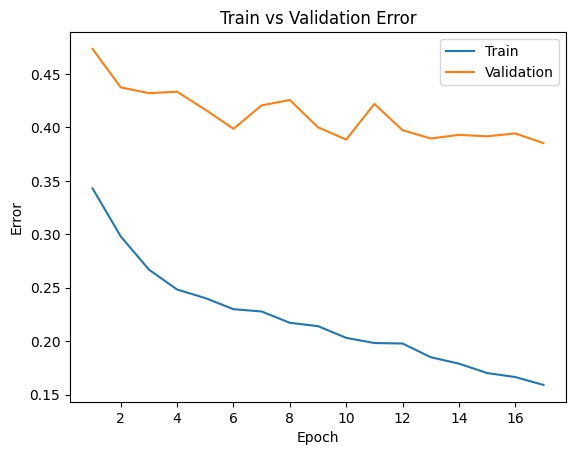

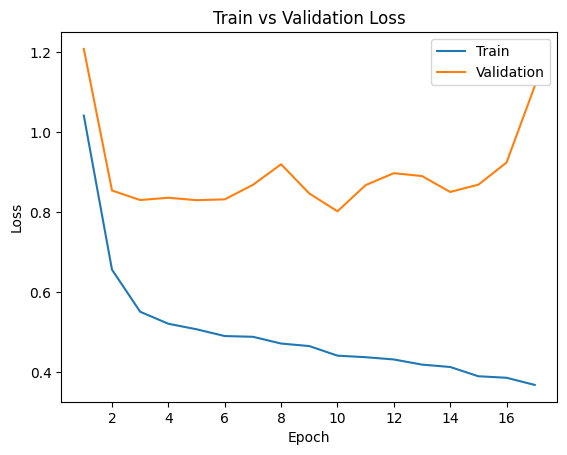

In [ ]:
plot_training_curve(get_baseline_name(epoch=17))

## Test

In [ ]:
net = Baseline()
model_path = get_baseline_name(epoch=17)
state = torch.load(model_path)
net.load_state_dict(state)

if torch.cuda.is_available():
    net = net.cuda()

_, _, test_loader = get_data_loaders(step=2)

test_error, _ = evaluate_baseline(net, test_loader)
print("The test classification accuracy is", 1 - test_error)

<ipython-input-29-b697d2521018>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


The test classification accuracy is 0.6196236559139785


# Primary Model

## Step 1

### Architectures

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class ConvAutoencoder(nn.Module):
  def __init__(self,
               activation=F.leaky_relu,
               bias=True,
               layers=7,
               weight_init=False):
    super(ConvAutoencoder, self).__init__()

    torch.manual_seed(42)

    self.layers = layers

    # Activation
    if activation == "TRec":
      self.activation = self.TRec
    else:
      self.activation = activation

    # Name
    self.name = "autoencoder"
    self.name += "_" + self.activation.__name__ + "_"
    if bias:
      self.name += "bias"
    else:
      self.name += "nobias"
    self.name += "_" + str(self.layers) + "layers"
    if weight_init:
      self.name += "_" + "wi"

    # Encoder convolutional layers
    self.enc_conv1 = nn.Conv2d(in_channels=3,
                               out_channels=16,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv2 = nn.Conv2d(in_channels=16,
                               out_channels=16,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv3 = nn.Conv2d(in_channels=16,
                               out_channels=32,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv4 = nn.Conv2d(in_channels=32,
                               out_channels=64,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv5 = nn.Conv2d(in_channels=64,
                               out_channels=128,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv6 = nn.Conv2d(in_channels=128,
                               out_channels=256,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)
    self.enc_conv7 = nn.Conv2d(in_channels=256,
                               out_channels=256,
                               kernel_size=3,
                               padding=1,
                               stride=2,
                               bias=bias)

    # Decoder convolutional layers
    self.dec_conv1 = nn.ConvTranspose2d(in_channels=256,
                                        out_channels=256,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv2 = nn.ConvTranspose2d(in_channels=256,
                                        out_channels=128,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv3 = nn.ConvTranspose2d(in_channels=128,
                                        out_channels=64,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv4 = nn.ConvTranspose2d(in_channels=64,
                                        out_channels=32,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv5 = nn.ConvTranspose2d(in_channels=32,
                                        out_channels=16,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv6 = nn.ConvTranspose2d(in_channels=16,
                                        out_channels=16,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)
    self.dec_conv7 = nn.ConvTranspose2d(in_channels=16,
                                        out_channels=3,
                                        kernel_size=3,
                                        padding=1,
                                        output_padding=1,
                                        stride=2,
                                        bias=bias)

    # Batch normalization
    self.norm16 = nn.BatchNorm2d(num_features=16)
    self.norm32 = nn.BatchNorm2d(num_features=32)
    self.norm64 = nn.BatchNorm2d(num_features=64)
    self.norm128 = nn.BatchNorm2d(num_features=128)
    self.norm256 = nn.BatchNorm2d(num_features=256)

    # Weight initialization
    if weight_init:
      if activation == F.leaky_relu:
        act_name = "leaky_relu"
      elif activation == "TRec" or activation == F.relu:
        act_name = "relu"

      nn.init.kaiming_normal_(self.enc_conv1.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv2.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv3.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv4.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv5.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv6.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.enc_conv7.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv1.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv2.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv3.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv4.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv5.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv6.weight, nonlinearity=act_name)
      nn.init.kaiming_normal_(self.dec_conv7.weight, nonlinearity=act_name)


  # https://arxiv.org/pdf/1402.3337
  def TRec(self, x, threshold=1):
    # Can't find a way to do element-wise operation on GPU, so instead subtract
    # by threshold element-wise, apply ReLU, and add by threshold element-wise
    x = torch.sub(x, threshold)
    x = F.relu(x)
    x = torch.add(x, threshold)

    return x


  def encode(self, x):
    # Input: Nx3x256x256
    x = self.norm16(self.activation(self.enc_conv1(x)))     # Output: 16x128x128
    if self.layers > 1:
      x = self.norm16(self.activation(self.enc_conv2(x)))   # Output: 16x64x64
    if self.layers > 2:
      x = self.norm32(self.activation(self.enc_conv3(x)))   # Output: 32x32x32
    if self.layers > 3:
      x = self.norm64(self.activation(self.enc_conv4(x)))   # Output: 64x16x16
    if self.layers > 4:
      x = self.norm128(self.activation(self.enc_conv5(x)))  # Output: 128x8x8
    if self.layers > 5:
      x = self.norm256(self.activation(self.enc_conv6(x)))  # Output: 256x4x4
    if self.layers > 6:
      x = self.norm256(self.activation(self.enc_conv7(x)))  # Output: 256x2x2

    return x


  def decode(self, x):
    if self.layers > 6:
      x = self.norm256(self.activation(self.dec_conv1(x)))  # Output: 256x4x4
    if self.layers > 5:
      x = self.norm128(self.activation(self.dec_conv2(x)))  # Output: 128x8x8
    if self.layers > 4:
      x = self.norm64(self.activation(self.dec_conv3(x)))   # Output: 64x16x16
    if self.layers > 3:
      x = self.norm32(self.activation(self.dec_conv4(x)))   # Output: 32x32x32
    if self.layers > 2:
      x = self.norm16(self.activation(self.dec_conv5(x)))   # Output: 16x64x64
    if self.layers > 1:
      x = self.norm16(self.activation(self.dec_conv6(x)))   # Output: 16x128x128
    # Using tanh because images are normalized to [-1, 1]
    x = F.tanh(self.dec_conv7(x))                           # Output: 3x256x256

    return x


  def forward(self, x):
    x = self.encode(x)
    x = self.decode(x)
    return x


autoencoder = ConvAutoencoder()
num_params = 0
for param in autoencoder.parameters():
    num_params += param.numel()
print("There are", num_params, "parameters in the autoencoder")


There are 1970755 parameters in the autoencoder


### Training

#### Functions

In [40]:
import matplotlib.pyplot as plt
import torch


# Plot training curve from model path
def plot_training_curve_step1(path):
  train_err = np.loadtxt("{}_train_err.csv".format(path))
  val_err = np.loadtxt("{}_val_err.csv".format(path))
  train_loss = np.loadtxt("{}_train_loss.csv".format(path))
  val_loss = np.loadtxt("{}_val_loss.csv".format(path))
  plt.title("Train vs Validation Error")
  n = len(train_err) # number of epochs
  plt.plot(range(1, n + 1), train_err, label="Train")
  plt.plot(range(1, n + 1), val_err, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Error")
  plt.legend(loc='best')
  plt.show()
  plt.title("Train vs Validation Loss")
  plt.plot(range(1, n + 1), train_loss, label="Train")
  plt.plot(range(1, n + 1), val_loss, label="Validation")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='best')
  plt.show()


In [32]:
import numpy as np
import time
import torch.optim as optim
from torch.utils.data import DataLoader


# Path that I (Nathan) use to save files; replace with your own folder if you
# want to run
NATHAN_PATH = '/content/drive/MyDrive/APS360_misc/'


# Get name of model checkpoint
def get_step1_model_name(name,
                         criterion,
                         optimizer,
                         batch_size=64,
                         learning_rate=0.01,
                         epoch=30):
  path = NATHAN_PATH + "model_{0}_bs{1}_lr{2}_{3}_{4}_epoch{5}".format(
      name,
      batch_size,
      learning_rate,
      type(criterion).__name__,
      optimizer.__name__,
      epoch)

  return path


# Evaluate data from loader on net
def evaluate_step1_net(net, loader, criterion):
  if loader == None:
    return None, None

  # Enable GPU usage
  if torch.cuda.is_available():
    net = net.cuda()

  total_loss = 0.0
  total_err = 0.0
  net.eval()
  with torch.no_grad():
    for i, data in enumerate(loader):
      imgs, _ = data

      # Enable GPU usage
      if torch.cuda.is_available():
        imgs = imgs.cuda()

      # Forward pass
      outputs = net(imgs)
      loss = criterion(outputs, imgs)

      # Update loss, error
      total_loss += loss.item()
      total_err += nn.MSELoss()(outputs, imgs).item()

  loss = float(total_loss) / len(loader)
  err = float(total_err) / len(loader)
  return loss, err


# Train baseline model on given datasets
def train_step1_net(net,
                    custom_train=None,
                    batch_size=64,
                    learning_rate=0.01,
                    optim_type=optim.SGD,
                    criterion=nn.MSELoss(),
                    num_epochs=30):
  torch.manual_seed(42)

  # Enable GPU usage
  if torch.cuda.is_available():
    net = net.cuda()

  # Arrays to record loss
  train_loss = np.zeros(num_epochs)
  train_err = np.zeros(num_epochs)
  val_loss = np.zeros(num_epochs)
  val_err = np.zeros(num_epochs)

  # Load data
  train_loader, val_loader, _ = get_data_loaders(step=1, batch_size=batch_size)
  if custom_train:
    train_loader = DataLoader(custom_train,
                             batch_size=batch_size,
                             shuffle=True,
                             num_workers=8,
                             pin_memory=True,
                             persistent_workers=True)
    val_loader = None

  # Initialize optimizer
  if optim_type.__name__ == "SGD":
    optimizer = optim_type(net.parameters(), lr=learning_rate, momentum=0.9)
  elif optim_type.__name__ == "Adam":
    optimizer = optim_type(net.parameters(), lr=learning_rate, weight_decay=0.01)
  else:
    optimizer = optim_type(net.parameters(), lr=learning_rate)

  scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)

  # Train
  start_time = time.time()
  for epoch in range(num_epochs):
    total_train_loss = 0.0
    total_train_err = 0.0
    num_samples = 0

    # Iterate through mini batches
    net.train()
    for i, data in enumerate(train_loader):
      imgs, _ = data
      imgs = imgs.clone().detach().requires_grad_(True)
      num_samples += len(imgs)

      # Enable GPU usage
      if torch.cuda.is_available():
        imgs = imgs.cuda()

      # Forward pass, backward pass, update
      optimizer.zero_grad()
      outputs = net(imgs)
      loss = criterion(outputs, imgs)
      loss.backward()
      optimizer.step()

      # Update training loss, error
      total_train_loss += loss.item()
      total_train_err += nn.MSELoss()(outputs, imgs).item()

    # Calculate total loss
    train_loss[epoch] = total_train_loss / len(train_loader)
    train_err[epoch] = total_train_err / len(train_loader)
    val_loss[epoch], val_err[epoch] = evaluate_step1_net(net,
                                                         val_loader,
                                                         criterion)

    # Print loss
    print(("Epoch {}: Train err: {}, Train loss: {} | " +
           "Validation err: {}, Validation loss: {}").format(
              epoch + 1,
              train_err[epoch],
              train_loss[epoch],
              val_err[epoch],
              val_loss[epoch]))

    # Save the current model (checkpoint) to a file
    model_path = get_step1_model_name(name=net.name,
                                      batch_size=batch_size,
                                      learning_rate=learning_rate,
                                      criterion=criterion,
                                      optimizer=optim_type,
                                      epoch=epoch + 1)
    torch.save(net.state_dict(), model_path)

    scheduler.step(train_loss[epoch])

  # Finish up
  print('Finished Training')
  end_time = time.time()
  elapsed_time = end_time - start_time
  print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

  # Write the train/val loss/error into CSV file for plotting later
  np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
  np.savetxt("{}_train_err.csv".format(model_path), train_err)
  np.savetxt("{}_val_loss.csv".format(model_path), val_loss)
  np.savetxt("{}_val_err.csv".format(model_path), val_err)


#### Overfit

In [28]:
overfit_model = ConvAutoencoder(layers=2)
train_step1_net(overfit_model,
                custom_train=get_small_batch(step=1, size=64),
                num_epochs=200)

Epoch 1: Train err: 0.5333325266838074, Train loss: 0.5333325266838074 | Validation err: nan, Validation loss: nan
Epoch 2: Train err: 0.5178889036178589, Train loss: 0.5178889036178589 | Validation err: nan, Validation loss: nan
Epoch 3: Train err: 0.4808824062347412, Train loss: 0.4808824062347412 | Validation err: nan, Validation loss: nan
Epoch 4: Train err: 0.4741569459438324, Train loss: 0.4741569459438324 | Validation err: nan, Validation loss: nan
Epoch 5: Train err: 0.4425996243953705, Train loss: 0.4425996243953705 | Validation err: nan, Validation loss: nan
Epoch 6: Train err: 0.4011790156364441, Train loss: 0.4011790156364441 | Validation err: nan, Validation loss: nan
Epoch 7: Train err: 0.37743568420410156, Train loss: 0.37743568420410156 | Validation err: nan, Validation loss: nan
Epoch 8: Train err: 0.3490704298019409, Train loss: 0.3490704298019409 | Validation err: nan, Validation loss: nan
Epoch 9: Train err: 0.32256531715393066, Train loss: 0.32256531715393066 | Val

#### Train


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.3976912847296758, Train loss: 0.3976912847296758 | Validation err: 0.3702339294056098, Validation loss: 0.3702339294056098
Epoch 2: Train err: 0.34721305763179605, Train loss: 0.34721305763179605 | Validation err: 0.3522974153359731, Validation loss: 0.3522974153359731
Epoch 3: Train err: 0.2631520586596294, Train loss: 0.2631520586596294 | Validation err: 0.3095327566067378, Validation loss: 0.3095327566067378
Epoch 4: Train err: 0.18597714958543127, Train loss: 0.18597714958543127 | Validation err: 0.29665084928274155, Validation loss: 0.29665084928274155
Epoch 5: Train err: 0.14703336866064506, Train loss: 0.14703336866064506 | Validation err: 0.27900824199120206, Validation loss: 0.27900824199120206
Epoch 6: Train err: 0.12062355190176856, Train loss: 0.12062355190176856 | Validation err: 0.234

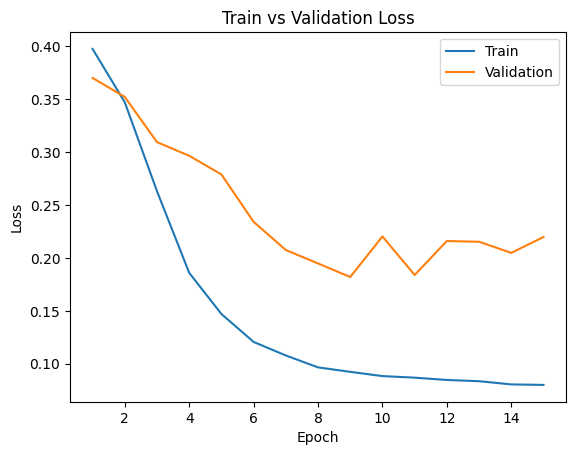


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 1
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.20088244390419938, Train loss: 0.20088244390419938 | Validation err: 0.3132134402791659, Validation loss: 0.3132134402791659
Epoch 2: Train err: 0.10189730767160654, Train loss: 0.10189730767160654 | Validation err: 0.29823046425978345, Validation loss: 0.29823046425978345
Epoch 3: Train err: 0.08786516725509004, Train loss: 0.08786516725509004 | Validation err: 0.2934219390153885, Validation loss: 0.2934219390153885
Epoch 4: Train err: 0.08522017668424682, Train loss: 0.08522017668424682 | Validation err: 0.2885620594024658, Validation loss: 0.2885620594024658
Epoch 5: Train err: 0.07994643145833503, Train loss: 0.07994643145833503 | Validation err: 0.3532264642417431, Validation loss: 0.3532264642417431
Epoch 6: Train err: 0.08169880272312598, Train loss: 0.08169880272312598 | Validation err: 0.3133

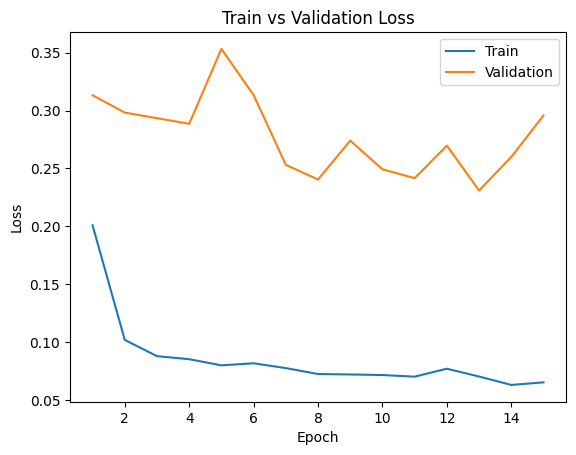


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: L1Loss


Epoch 1: Train err: 0.40354173935272475, Train loss: 0.5338270298459313 | Validation err: 0.38767853130896884, Validation loss: 0.49784096454580623
Epoch 2: Train err: 0.2845120739869096, Train loss: 0.43750666217370465 | Validation err: 0.3046316057443619, Validation loss: 0.4261801379422347
Epoch 3: Train err: 0.16896956524049694, Train loss: 0.31813878091898834 | Validation err: 0.2074641858537992, Validation loss: 0.35418012489875156
Epoch 4: Train err: 0.1157712655311281, Train loss: 0.2472785579209978 | Validation err: 0.2701244515677293, Validation loss: 0.40262966727217037
Epoch 5: Train err: 0.10411240897056731, Train loss: 0.22576031800020824 | Validation err: 0.2613658340026935, Validation loss: 0.3919721196095149
Epoch 6: Train err: 0.09536117306825789, Train loss: 0.21409641494127837 | Validation err: 0.2552

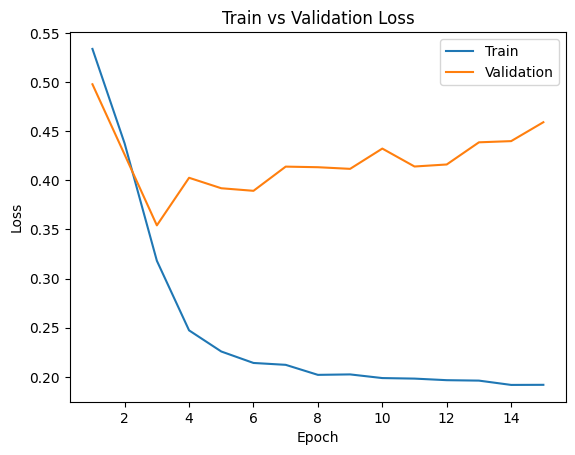


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 0.01
	Optimizer: Adam
	Loss function: MSELoss


Epoch 1: Train err: 0.18279346442696723, Train loss: 0.18279346442696723 | Validation err: 0.32602913056810695, Validation loss: 0.32602913056810695
Epoch 2: Train err: 0.08449031531133434, Train loss: 0.08449031531133434 | Validation err: 0.3496666078766187, Validation loss: 0.3496666078766187
Epoch 3: Train err: 0.07367438285357573, Train loss: 0.07367438285357573 | Validation err: 0.29271702468395233, Validation loss: 0.29271702468395233
Epoch 4: Train err: 0.06918716413730924, Train loss: 0.06918716413730924 | Validation err: 0.2962789883216222, Validation loss: 0.2962789883216222
Epoch 5: Train err: 0.06969893139533022, Train loss: 0.06969893139533022 | Validation err: 0.3154630983869235, Validation loss: 0.3154630983869235
Epoch 6: Train err: 0.06526531190188094, Train loss: 0.06526531190188094 | Validation err: 

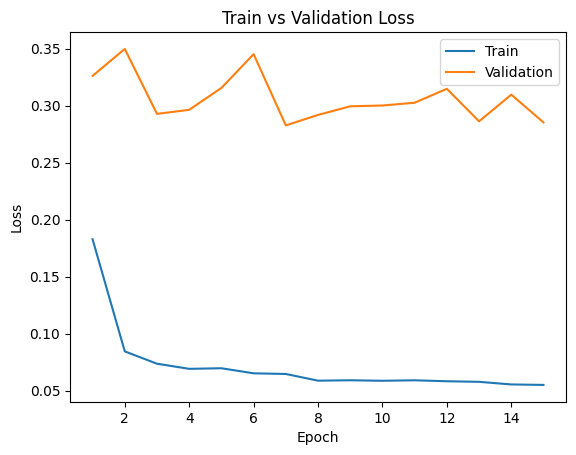


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 3
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.1830799592743543, Train loss: 0.1830799592743543 | Validation err: 0.1177536699300011, Validation loss: 0.1177536699300011
Epoch 2: Train err: 0.06076706209304658, Train loss: 0.06076706209304658 | Validation err: 0.11635557437936465, Validation loss: 0.11635557437936465
Epoch 3: Train err: 0.05136422224512154, Train loss: 0.05136422224512154 | Validation err: 0.12421364492426316, Validation loss: 0.12421364492426316
Epoch 4: Train err: 0.04402103880420327, Train loss: 0.04402103880420327 | Validation err: 0.13430913196255764, Validation loss: 0.13430913196255764
Epoch 5: Train err: 0.041873469038612464, Train loss: 0.041873469038612464 | Validation err: 0.12345843048145373, Validation loss: 0.12345843048145373
Epoch 6: Train err: 0.03477590857073665, Train loss: 0.03477590857073665 | Validation er

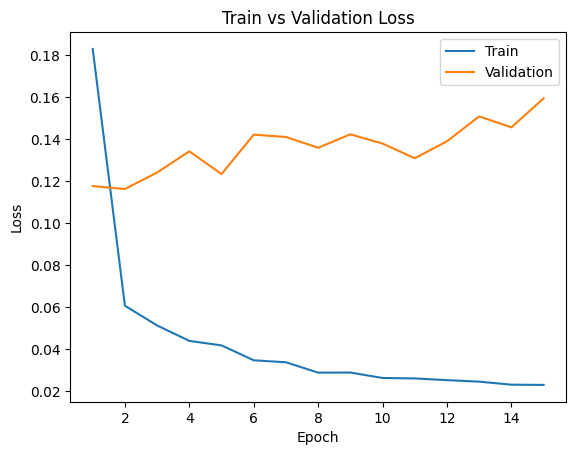


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 32
	Learning rate: 0.005
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.38191060730389187, Train loss: 0.38191060730389187 | Validation err: 0.35449774468198736, Validation loss: 0.35449774468198736
Epoch 2: Train err: 0.3319362420695169, Train loss: 0.3319362420695169 | Validation err: 0.34103032439313036, Validation loss: 0.34103032439313036
Epoch 3: Train err: 0.18803838968276979, Train loss: 0.18803838968276979 | Validation err: 0.22237892607425122, Validation loss: 0.22237892607425122
Epoch 4: Train err: 0.11743497942175184, Train loss: 0.11743497942175184 | Validation err: 0.26175036170381183, Validation loss: 0.26175036170381183
Epoch 5: Train err: 0.10323780660118376, Train loss: 0.10323780660118376 | Validation err: 0.2615617976543751, Validation loss: 0.2615617976543751
Epoch 6: Train err: 0.0970980645929064, Train loss: 0.0970980645929064 | Validation err: 

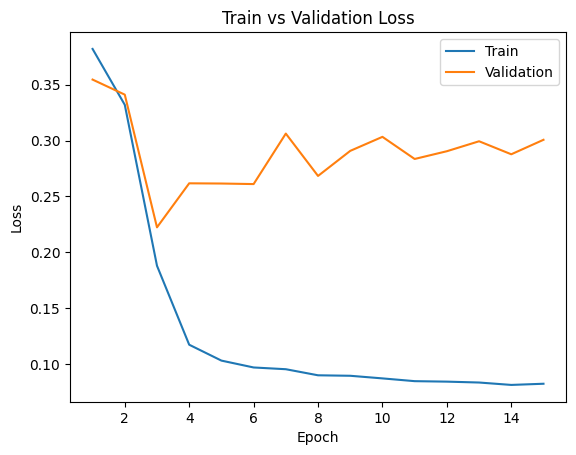


Settings:
	Activation function: leaky_relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 128
	Learning rate: 0.05
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.3751300329511816, Train loss: 0.3751300329511816 | Validation err: 0.4017464866240819, Validation loss: 0.4017464866240819
Epoch 2: Train err: 0.33157443322918634, Train loss: 0.33157443322918634 | Validation err: 0.2919042458136876, Validation loss: 0.2919042458136876
Epoch 3: Train err: 0.21616480228575793, Train loss: 0.21616480228575793 | Validation err: 0.24521059667070708, Validation loss: 0.24521059667070708
Epoch 4: Train err: 0.11470257084478032, Train loss: 0.11470257084478032 | Validation err: 0.2149569516380628, Validation loss: 0.2149569516380628
Epoch 5: Train err: 0.09386572665111585, Train loss: 0.09386572665111585 | Validation err: 0.22465967511137327, Validation loss: 0.22465967511137327
Epoch 6: Train err: 0.08607302944768559, Train loss: 0.08607302944768559 | Validation err: 0.

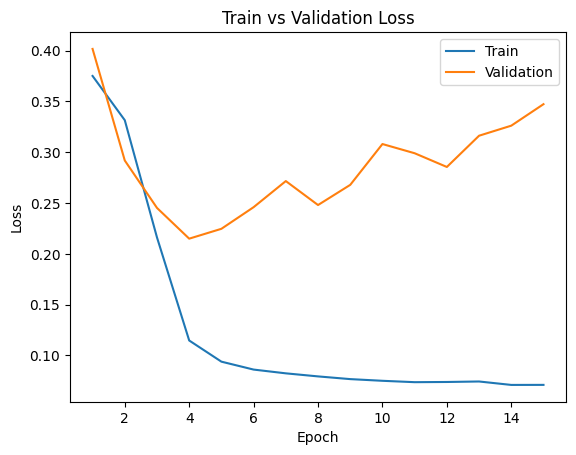


Settings:
	Activation function: relu
	Kernel bias: True
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.3833731741390445, Train loss: 0.3833731741390445 | Validation err: 0.3640119632085164, Validation loss: 0.3640119632085164
Epoch 2: Train err: 0.334930746731433, Train loss: 0.334930746731433 | Validation err: 0.39366209631164867, Validation loss: 0.39366209631164867
Epoch 3: Train err: 0.22772244110026144, Train loss: 0.22772244110026144 | Validation err: 0.26699454089005786, Validation loss: 0.26699454089005786
Epoch 4: Train err: 0.142482421614907, Train loss: 0.142482421614907 | Validation err: 0.26701835977534455, Validation loss: 0.26701835977534455
Epoch 5: Train err: 0.11270442554219202, Train loss: 0.11270442554219202 | Validation err: 0.25900362121562165, Validation loss: 0.25900362121562165
Epoch 6: Train err: 0.10003673352978447, Train loss: 0.10003673352978447 | Validation err: 0.26589380142

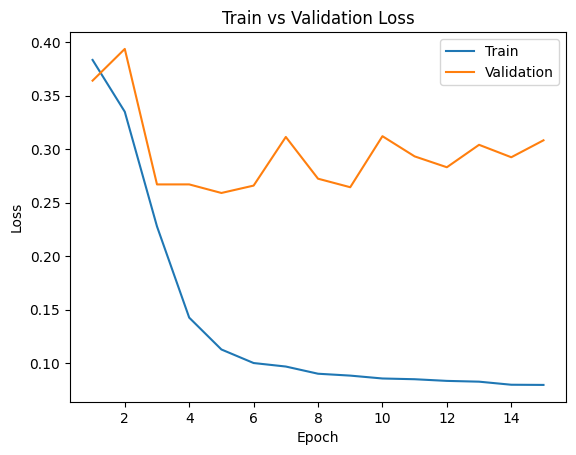


Settings:
	Activation function: TRec
	Kernel bias: False
	Encoder/decoder layers: 6
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.36185482347553427, Train loss: 0.36185482347553427 | Validation err: 0.3457847076157729, Validation loss: 0.3457847076157729
Epoch 2: Train err: 0.35489698973569, Train loss: 0.35489698973569 | Validation err: 0.3386140391230583, Validation loss: 0.3386140391230583
Epoch 3: Train err: 0.35195374048568984, Train loss: 0.35195374048568984 | Validation err: 0.4019015431404114, Validation loss: 0.4019015431404114
Epoch 4: Train err: 0.35794946957718243, Train loss: 0.35794946957718243 | Validation err: 0.5069600765903791, Validation loss: 0.5069600765903791
Epoch 5: Train err: 0.3513161428272724, Train loss: 0.3513161428272724 | Validation err: 0.636345773935318, Validation loss: 0.636345773935318
Epoch 6: Train err: 0.3513280969451774, Train loss: 0.3513280969451774 | Validation err: 0.4762593594690164, Va

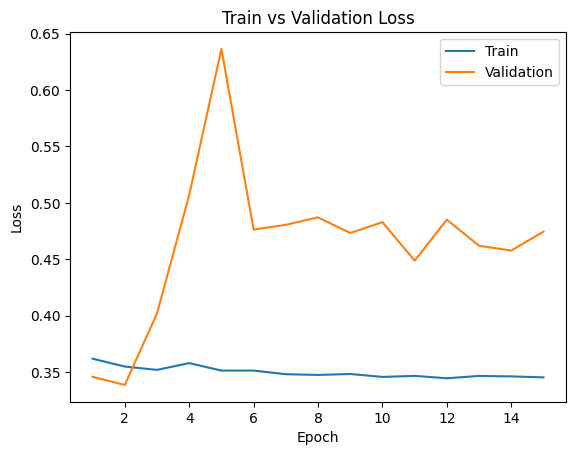

In [29]:
# First set of settings

settings = []
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":64,
                 "lr":1,      "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.L1Loss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":64,
                 "lr":0.01,   "optim":optim.Adam, "crit":nn.MSELoss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":3, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":32,
                 "lr":0.005,  "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":F.leaky_relu,  "bias":True,  "layers":6, "bs":128,
                 "lr":0.05,   "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":F.relu,        "bias":True,  "layers":6, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss()})
settings.append({"act":"TRec",        "bias":False, "layers":6, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss()})

for s in settings:
  print("\nSettings:")
  print("\tActivation function:",
        s["act"] if s["act"] == "TRec" else s["act"].__name__)
  print("\tKernel bias:", s["bias"])
  print("\tEncoder/decoder layers:", s["layers"])
  print("\tBatch size:", s["bs"])
  print("\tLearning rate:", s["lr"])
  print("\tOptimizer:", s["optim"].__name__)
  print("\tLoss function:", type(s["crit"]).__name__)
  print("\n")

  autoencoder = ConvAutoencoder(activation=s["act"],
                                bias=s["bias"],
                                layers=s["layers"])
  train_step1_net(autoencoder,
                  batch_size=s["bs"],
                  learning_rate=s["lr"],
                  optim_type=s["optim"],
                  criterion=s["crit"],
                  num_epochs=15)

  plot_training_curve_step1(get_step1_model_name(name=autoencoder.name,
                                                 criterion=s["crit"],
                                                 optimizer=s["optim"],
                                                 batch_size=s["bs"],
                                                 learning_rate=s["lr"],
                                                 epoch=15))

Observations:
* We often have very early overfitting
* The best validation curve is with the first settings
* TRec does not seem viable
* L1 loss does not seem viable

Next:
* Will experiment with weight initialization
* Will test Adam with weight decay
* Will try more epochs for validation curves which seemed to plateau
* Will try Huber and Perceptual loss functions





In [36]:
# Perceptual loss implementation
import torchvision.models as models

class PerceptualLoss(nn.Module):
    def __init__(self, layer_ids=[3, 8, 15], loss_type="l1"):
        super(PerceptualLoss, self).__init__()

        # Load a pre-trained VGG16 model
        vgg = models.vgg16(pretrained=True).features

        # Extract only the selected layers
        self.feature_extractor = nn.Sequential(*[vgg[i] for i in range(max(layer_ids) + 1)])
        # Enable GPU usage
        if torch.cuda.is_available():
          self.feature_extractor = self.feature_extractor.cuda()

        # Freeze VGG weights (we don’t want to train it)
        for param in self.feature_extractor.parameters():
            param.requires_grad = False

        # Choose L1 or L2 loss
        self.loss_fn = nn.L1Loss() if loss_type == "l1" else nn.MSELoss()

        # Store selected layer IDs
        self.layer_ids = layer_ids

    def forward(self, real, generated):
        loss = 0.0

        # Extract features from selected layers
        for i, layer in enumerate(self.feature_extractor):
            real = layer(real)
            generated = layer(generated)

            if i in self.layer_ids:
                loss += self.loss_fn(real, generated)

        return torch.Tensor(loss)


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.3639233395118605, Train loss: 0.3639233395118605 | Validation err: 0.2787965026994546, Validation loss: 0.2787965026994546
Epoch 2: Train err: 0.20887636799703946, Train loss: 0.20887636799703946 | Validation err: 0.22645392889777818, Validation loss: 0.22645392889777818
Epoch 3: Train err: 0.15752313946458427, Train loss: 0.15752313946458427 | Validation err: 0.20521782152354717, Validation loss: 0.20521782152354717
Epoch 4: Train err: 0.12550421990454197, Train loss: 0.12550421990454197 | Validation err: 0.16478865407407284, Validation loss: 0.16478865407407284
Epoch 5: Train err: 0.11047601284967228, Train loss: 0.11047601284967228 | Validation err: 0.14702941911915937, Validation loss: 0.14702941911915937
Epoch 6: Train err: 0.09835348041220145, Train loss: 0.09835348041220145 | Vali

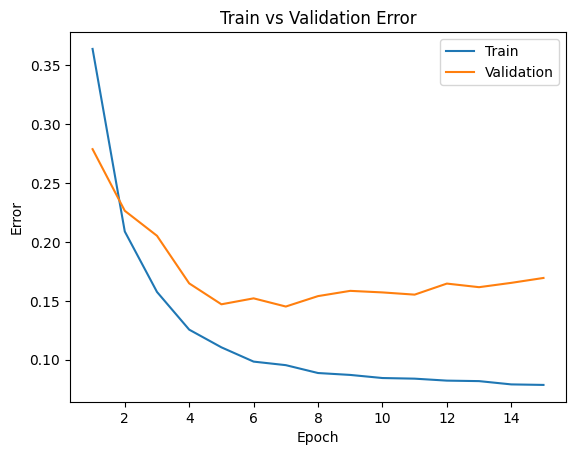

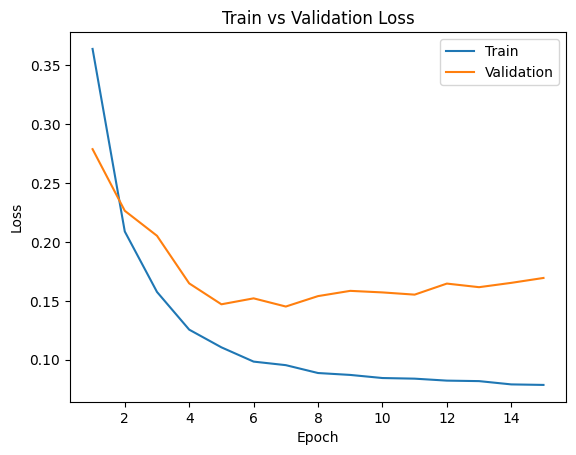


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: True
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.5584738715128466, Train loss: 0.5584738715128466 | Validation err: 0.4233587545653184, Validation loss: 0.4233587545653184
Epoch 2: Train err: 0.3743393902074207, Train loss: 0.3743393902074207 | Validation err: 0.40906940897305805, Validation loss: 0.40906940897305805
Epoch 3: Train err: 0.3652639070695097, Train loss: 0.3652639070695097 | Validation err: 0.3997436997791131, Validation loss: 0.3997436997791131
Epoch 4: Train err: 0.36197359148751607, Train loss: 0.36197359148751607 | Validation err: 0.40670780713359517, Validation loss: 0.40670780713359517
Epoch 5: Train err: 0.35947350785136223, Train loss: 0.35947350785136223 | Validation err: 0.40453410024444264, Validation loss: 0.40453410024444264
Epoch 6: Train err: 0.3580751869488846, Train loss: 0.3580751869488846 | Validation er

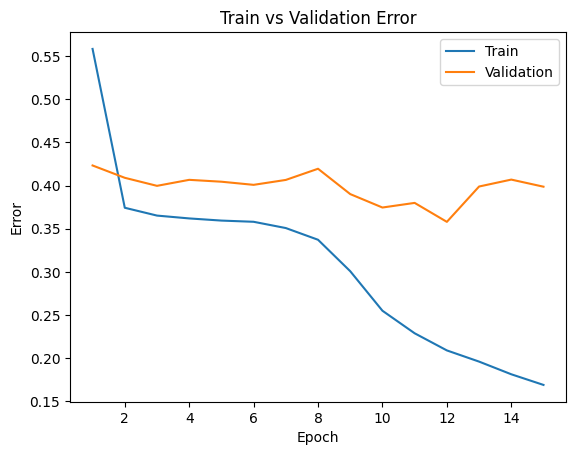

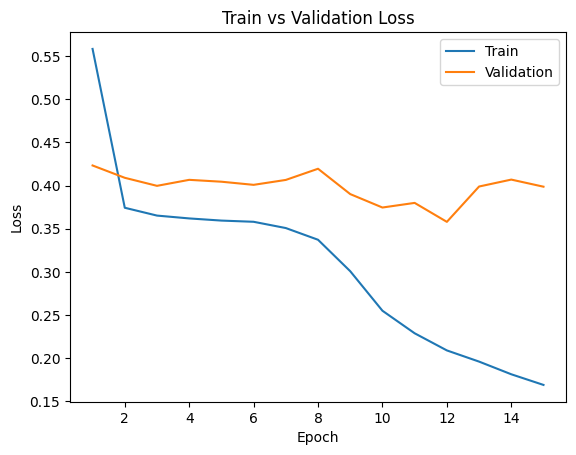


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 4
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: MSELoss


Epoch 1: Train err: 0.27380350045859814, Train loss: 0.27380350045859814 | Validation err: 0.3108430281281471, Validation loss: 0.3108430281281471
Epoch 2: Train err: 0.08305741084570234, Train loss: 0.08305741084570234 | Validation err: 0.32919035976131755, Validation loss: 0.32919035976131755
Epoch 3: Train err: 0.06826705430549654, Train loss: 0.06826705430549654 | Validation err: 0.3179976666967074, Validation loss: 0.3179976666967074
Epoch 4: Train err: 0.06164519357579676, Train loss: 0.06164519357579676 | Validation err: 0.3423163319627444, Validation loss: 0.3423163319627444
Epoch 5: Train err: 0.06189991110427813, Train loss: 0.06189991110427813 | Validation err: 0.3076704355577628, Validation loss: 0.3076704355577628
Epoch 6: Train err: 0.056428321383216164, Train loss: 0.056428321383216164 | Valida

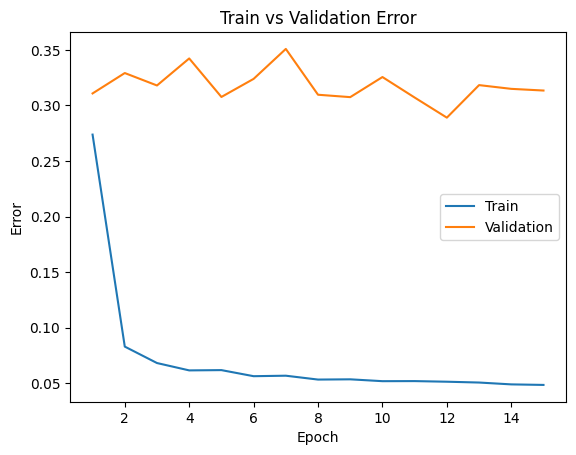

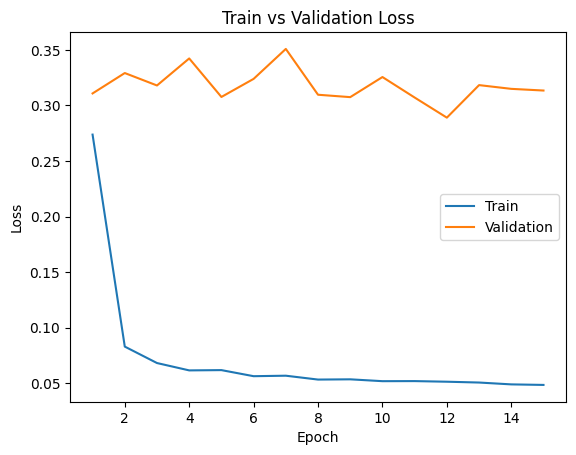


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: Adam
	Loss function: MSELoss


Epoch 1: Train err: 0.17795149711045352, Train loss: 0.17795149711045352 | Validation err: 0.32463425894578296, Validation loss: 0.32463425894578296
Epoch 2: Train err: 0.1291303432292559, Train loss: 0.1291303432292559 | Validation err: 0.3295399807393551, Validation loss: 0.3295399807393551
Epoch 3: Train err: 0.10224121978337114, Train loss: 0.10224121978337114 | Validation err: 0.33492420241236687, Validation loss: 0.33492420241236687
Epoch 4: Train err: 0.0910181233828718, Train loss: 0.0910181233828718 | Validation err: 0.3392086774110794, Validation loss: 0.3392086774110794
Epoch 5: Train err: 0.08661043449220332, Train loss: 0.08661043449220332 | Validation err: 0.3361756404240926, Validation loss: 0.3361756404240926
Epoch 6: Train err: 0.08812804841859774, Train loss: 0.08812804841859774 | Validatio

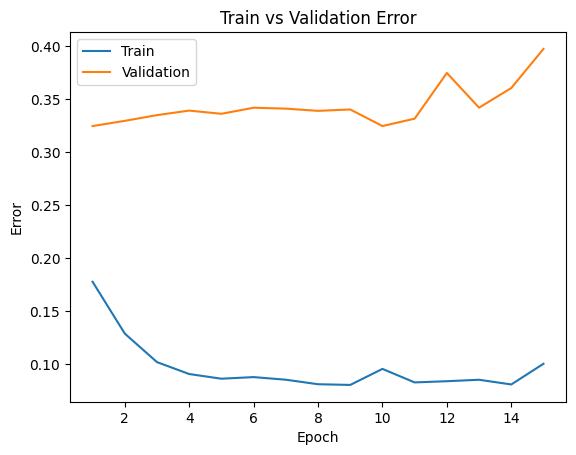

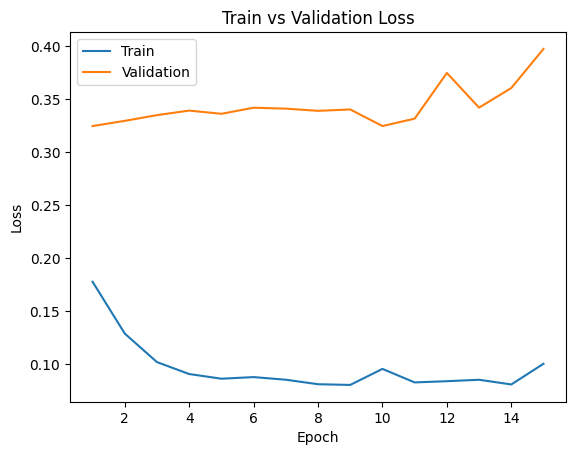


Settings:
	Activation function: relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: Adam
	Loss function: MSELoss


Epoch 1: Train err: 0.18016285288401626, Train loss: 0.18016285288401626 | Validation err: 0.3386823783318202, Validation loss: 0.3386823783318202
Epoch 2: Train err: 0.12851273268461227, Train loss: 0.12851273268461227 | Validation err: 0.3314484233657519, Validation loss: 0.3314484233657519
Epoch 3: Train err: 0.10494303999638016, Train loss: 0.10494303999638016 | Validation err: 0.34323810289303464, Validation loss: 0.34323810289303464
Epoch 4: Train err: 0.0936025082218376, Train loss: 0.0936025082218376 | Validation err: 0.3391714630027612, Validation loss: 0.3391714630027612
Epoch 5: Train err: 0.09001576892015609, Train loss: 0.09001576892015609 | Validation err: 0.33320291216174763, Validation loss: 0.33320291216174763
Epoch 6: Train err: 0.08220482731915334, Train loss: 0.08220482731915334 | Validation er

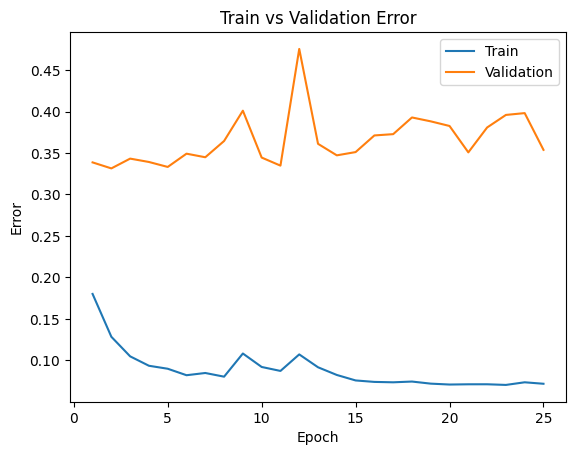

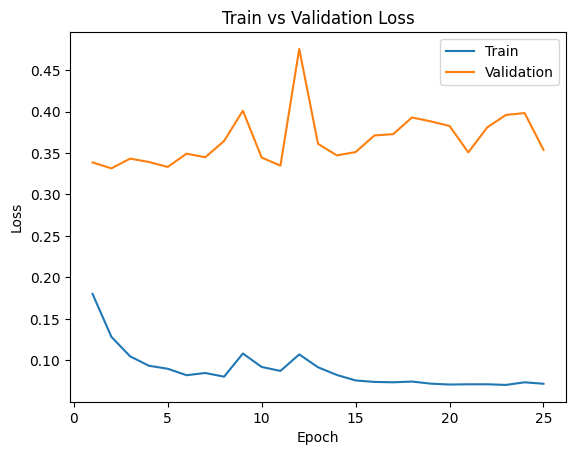


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 32
	Learning rate: 0.005
	Optimizer: Adam
	Loss function: MSELoss


Epoch 1: Train err: 0.1510017734340259, Train loss: 0.1510017734340259 | Validation err: 0.32365507965392254, Validation loss: 0.32365507965392254
Epoch 2: Train err: 0.1150682139822415, Train loss: 0.1150682139822415 | Validation err: 0.33404428147255105, Validation loss: 0.33404428147255105
Epoch 3: Train err: 0.0951118374296597, Train loss: 0.0951118374296597 | Validation err: 0.3470572550246056, Validation loss: 0.3470572550246056
Epoch 4: Train err: 0.07897280595132283, Train loss: 0.07897280595132283 | Validation err: 0.3422082326513656, Validation loss: 0.3422082326513656
Epoch 5: Train err: 0.07718350037932396, Train loss: 0.07718350037932396 | Validation err: 0.36217085858608816, Validation loss: 0.36217085858608816
Epoch 6: Train err: 0.08135215644325529, Train loss: 0.08135215644325529 | Validati

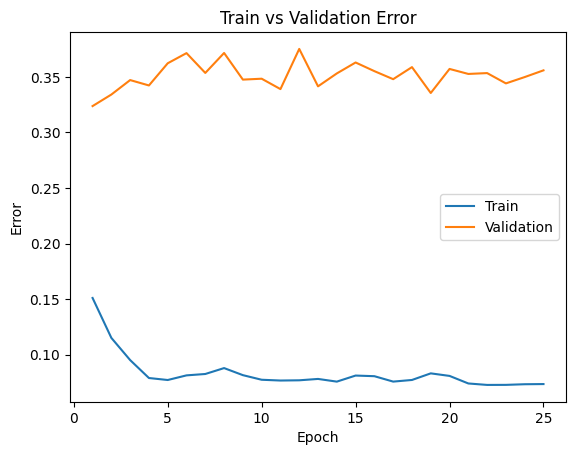

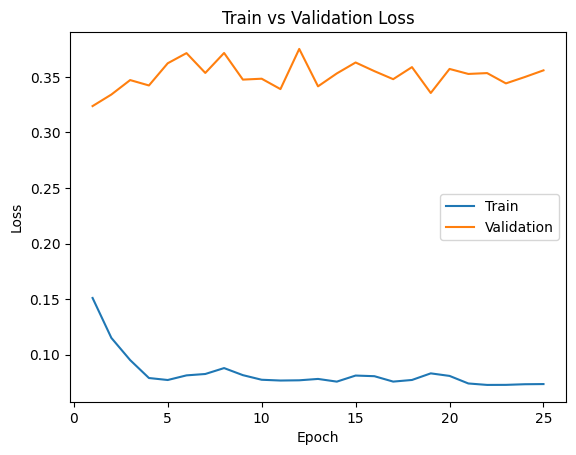


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: HuberLoss


Epoch 1: Train err: 0.4277762794359164, Train loss: 0.20884222029284996 | Validation err: 0.4077889534334342, Validation loss: 0.1982218318929275
Epoch 2: Train err: 0.3560658117586916, Train loss: 0.17666877535256473 | Validation err: 0.3860706090927124, Validation loss: 0.18890671307841936
Epoch 3: Train err: 0.3480216200378808, Train loss: 0.17302760752764615 | Validation err: 0.36367491881052655, Validation loss: 0.1800338514149189
Epoch 4: Train err: 0.31449292159893294, Train loss: 0.1563725723800334 | Validation err: 0.3445570804178715, Validation loss: 0.16886604701479277
Epoch 5: Train err: 0.1975205002183264, Train loss: 0.09777120018208568 | Validation err: 0.3995300903916359, Validation loss: 0.19487514471014342
Epoch 6: Train err: 0.1313207195225087, Train loss: 0.06489976931532676 | Validation

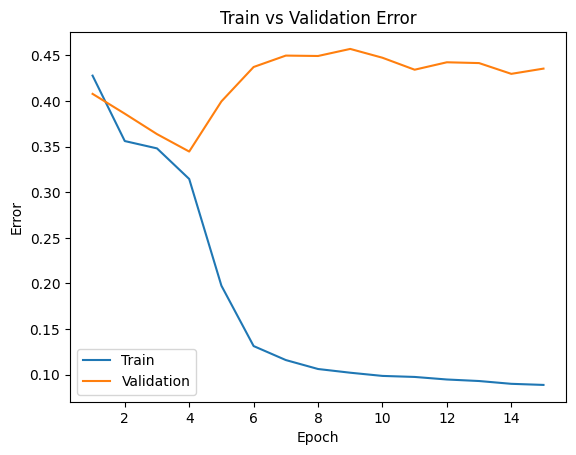

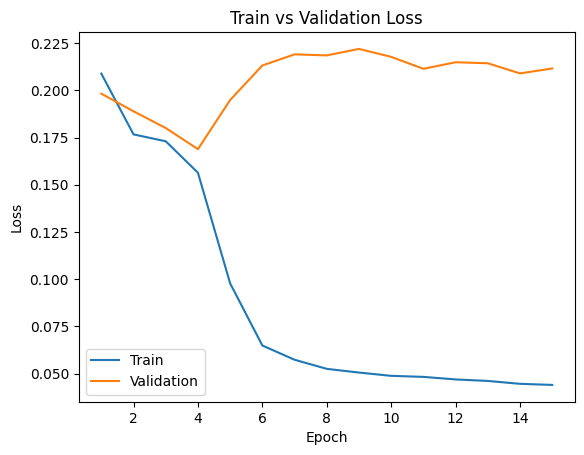


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: Adam
	Loss function: HuberLoss


Epoch 1: Train err: 0.1962191964584318, Train loss: 0.09740052761679346 | Validation err: 0.33858582998315495, Validation loss: 0.16886508154372373
Epoch 2: Train err: 0.13902194908058102, Train loss: 0.06922114530408924 | Validation err: 0.33666160454352695, Validation loss: 0.16827301494777203
Epoch 3: Train err: 0.11555317196656358, Train loss: 0.057603685396977446 | Validation err: 0.3334357899924119, Validation loss: 0.16660682981212935
Epoch 4: Train err: 0.10131977024403485, Train loss: 0.050537101585756646 | Validation err: 0.34567570065458614, Validation loss: 0.17281612691779932
Epoch 5: Train err: 0.10405409073626454, Train loss: 0.05186328287659721 | Validation err: 0.34321655705571175, Validation loss: 0.17159240071972212
Epoch 6: Train err: 0.1005482395941561, Train loss: 0.05015116862275384 

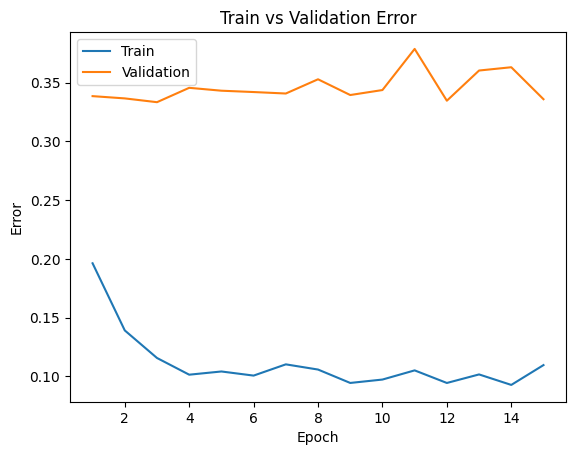

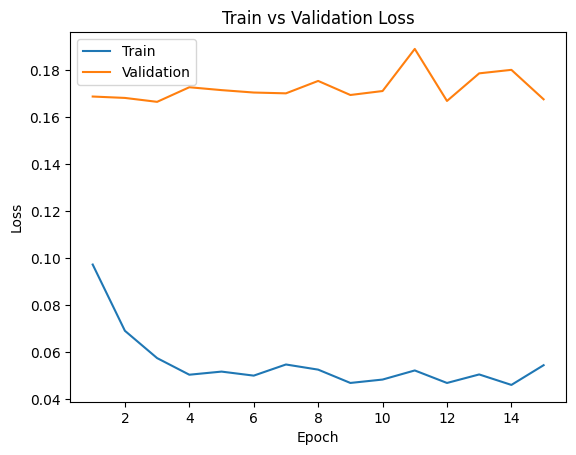


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: HuberLoss


Epoch 1: Train err: 0.4062561054121364, Train loss: 0.19944289174269547 | Validation err: 0.3668094662328561, Validation loss: 0.18080230678121248
Epoch 2: Train err: 0.3538046238774603, Train loss: 0.17555981383404948 | Validation err: 0.3904319728414218, Validation loss: 0.1886229751010736
Epoch 3: Train err: 0.3348523053255948, Train loss: 0.16607287407598711 | Validation err: 0.38961950317025185, Validation loss: 0.18450586621960005
Epoch 4: Train err: 0.25995878350328316, Train loss: 0.12917862663214857 | Validation err: 0.30979369953274727, Validation loss: 0.14870265933374563
Epoch 5: Train err: 0.18937611969357188, Train loss: 0.09421595558524132 | Validation err: 0.2426287674655517, Validation loss: 0.11793609367062648
Epoch 6: Train err: 0.14174330200661311, Train loss: 0.07051684855568138 | Valid

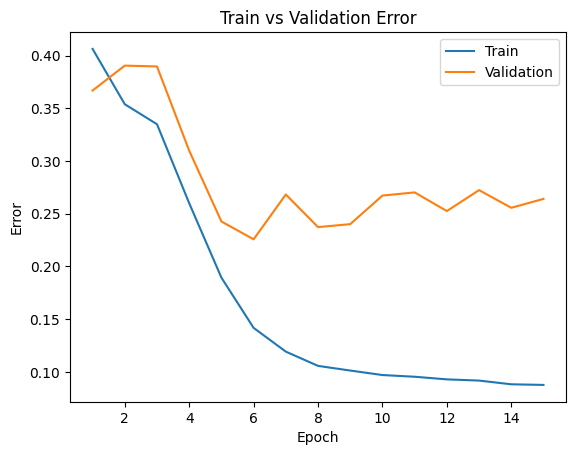

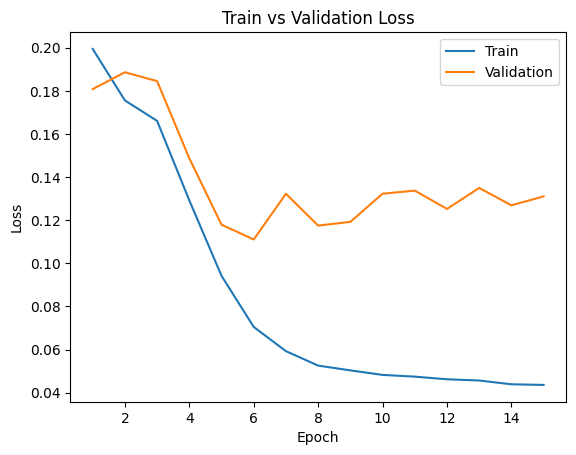


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: Adam
	Loss function: PerceptualLoss


Epoch 1: Train err: 0.3595201257954944, Train loss: 1.1738963953473351 | Validation err: 0.351036141316096, Validation loss: 1.2225345522165298
Epoch 2: Train err: 0.3472987064583735, Train loss: 1.1275080916556446 | Validation err: 0.4570792466402054, Validation loss: 2.156158924102783
Epoch 3: Train err: 0.3466173539107496, Train loss: 1.1286140951243313 | Validation err: 0.33983904992540676, Validation loss: 1.1369192947944005
Epoch 4: Train err: 0.3459259312261235, Train loss: 1.1319700357588856 | Validation err: 0.34119456882278126, Validation loss: 1.160666326681773
Epoch 5: Train err: 0.34621222791346634, Train loss: 1.1201600554314526 | Validation err: 0.33712056775887805, Validation loss: 1.137087658047676
Epoch 6: Train err: 0.3469198488376357, Train loss: 1.1169310930100353 | Validation err

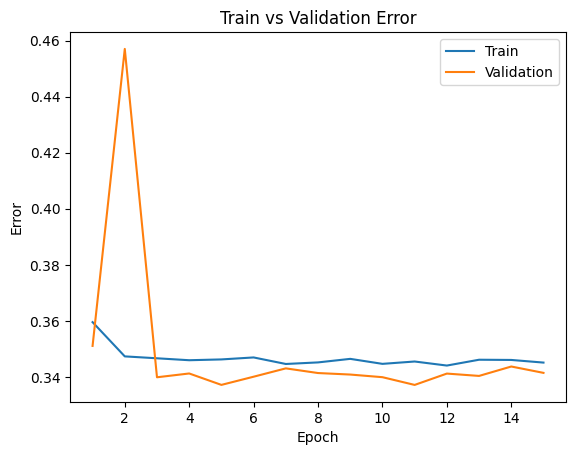

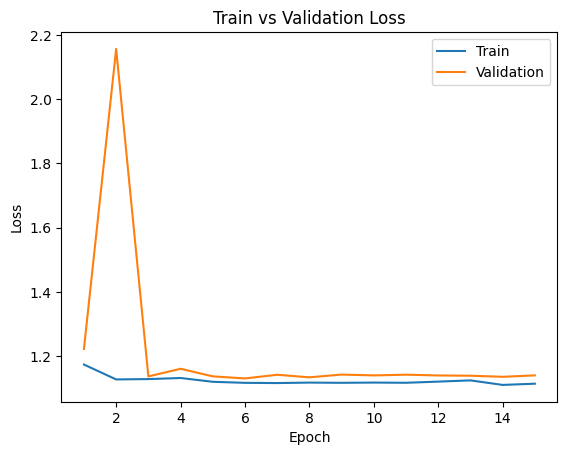


Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 6
	Weight initialization: False
	Batch size: 64
	Learning rate: 0.01
	Optimizer: SGD
	Loss function: PerceptualLoss


Epoch 1: Train err: 0.3711390640925277, Train loss: 1.318740041418509 | Validation err: 0.3496378983060519, Validation loss: 1.2053306301434834
Epoch 2: Train err: 0.35484685918146913, Train loss: 1.171589588577097 | Validation err: 0.34469035143653554, Validation loss: 1.1470938324928284
Epoch 3: Train err: 0.3536140915345062, Train loss: 1.1651109646667133 | Validation err: 0.34437589968244237, Validation loss: 1.1417102813720703
Epoch 4: Train err: 0.35290406237949024, Train loss: 1.16440241987055 | Validation err: 0.34586690987149876, Validation loss: 1.1579760412375133
Epoch 5: Train err: 0.3532792055471377, Train loss: 1.1573294631459496 | Validation err: 0.34154265622297925, Validation loss: 1.1429575731356938
Epoch 6: Train err: 0.3533379997719418, Train loss: 1.1548637016253038 | Validation er

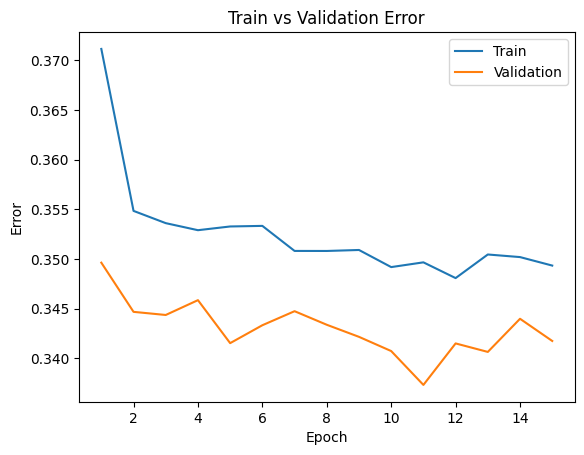

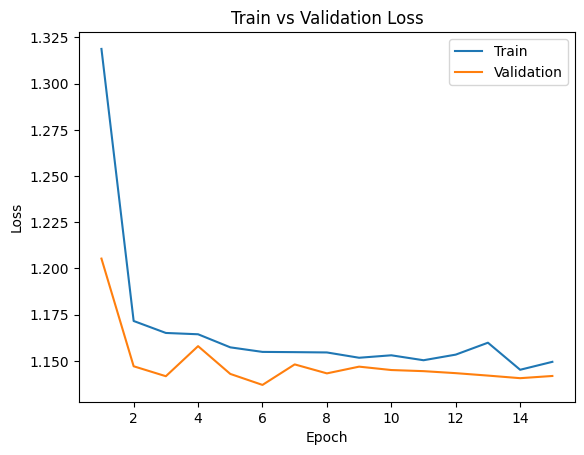

In [41]:
settings = []
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":True,   "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,  "layers":4, "winit":False,  "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.01,   "optim":optim.Adam, "crit":nn.MSELoss(),
                 "epochs":15})
settings.append({"act":F.relu,        "layers":6, "winit":False,  "bs":64,
                 "lr":0.01,   "optim":optim.Adam, "crit":nn.MSELoss(),
                 "epochs":25})
settings.append({"act":F.leaky_relu,   "layers":6, "winit":False, "bs":32,
                 "lr":0.005,  "optim":optim.Adam, "crit":nn.MSELoss(),
                 "epochs":25})
settings.append({"act":F.leaky_relu,   "layers":6, "winit":False, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":nn.HuberLoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,   "layers":6, "winit":False, "bs":64,
                 "lr":0.01,   "optim":optim.Adam, "crit":nn.HuberLoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,   "layers":6, "winit":False, "bs":64,
                 "lr":0.01,   "optim":optim.Adam, "crit":PerceptualLoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,   "layers":6, "winit":False, "bs":64,
                 "lr":0.01,   "optim":optim.SGD,  "crit":PerceptualLoss(),
                 "epochs":15})

for s in settings:
  print("\nSettings:")
  print("\tActivation function:",
        s["act"] if s["act"] == "TRec" else s["act"].__name__)
  print("\tEncoder/decoder layers:", s["layers"])
  print("\tWeight initialization:", s["winit"])
  print("\tBatch size:", s["bs"])
  print("\tLearning rate:", s["lr"])
  print("\tOptimizer:", s["optim"].__name__)
  print("\tLoss function:", type(s["crit"]).__name__)
  print("\n")

  autoencoder = ConvAutoencoder(activation=s["act"],
                                layers=s["layers"],
                                weight_init=s["winit"])
  train_step1_net(autoencoder,
                  batch_size=s["bs"],
                  learning_rate=s["lr"],
                  optim_type=s["optim"],
                  criterion=s["crit"],
                  num_epochs=s["epochs"])

  plot_training_curve_step1(get_step1_model_name(name=autoencoder.name,
                                                 criterion=s["crit"],
                                                 optimizer=s["optim"],
                                                 batch_size=s["bs"],
                                                 learning_rate=s["lr"],
                                                 epoch=s["epochs"]))

Observations:
* It seems like Adam may not be viable
* HuberLoss seems similar to MSELoss but validation is more erratic
* PerceptualLoss seems to learn very slowly
* There is still a lot of early overfitting

Next:
* Will try adding a convolutional layer to address early overfitting
* Will try PerceptualLoss with higher learning rate and batch size
* Will test Adam once with a lower learning rate and more epochs
* Will try MSELoss, HuberLoss with a lower learning rate and more epochs
* Will try using weight initialization with a slightly lower learning rate and more epochs

In [ ]:
settings = []
settings.append({"act":F.leaky_relu,  "layers":7, "winit":False,  "bs":128,
                 "lr":0.05,   "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":True,  "bs":128,
                 "lr":0.07,   "optim":optim.SGD,  "crit":PerceptualLoss(),
                 "epochs":15})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.0001, "optim":optim.Adam, "crit":nn.MSELoss(),
                 "epochs":40})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.003,  "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":40})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.003,  "optim":optim.SGD,  "crit":nn.HuberLoss(),
                 "epochs":40})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":False,  "bs":64,
                 "lr":0.003,  "optim":optim.SGD,  "crit":nn.HuberLoss(),
                 "epochs":40})
settings.append({"act":F.leaky_relu,  "layers":6, "winit":True,  "bs":64,
                 "lr":0.007,  "optim":optim.SGD,  "crit":nn.MSELoss(),
                 "epochs":40})

for s in settings:
  print("\nSettings:")
  print("\tActivation function:",
        s["act"] if s["act"] == "TRec" else s["act"].__name__)
  print("\tEncoder/decoder layers:", s["layers"])
  print("\tWeight initialization:", s["winit"])
  print("\tBatch size:", s["bs"])
  print("\tLearning rate:", s["lr"])
  print("\tOptimizer:", s["optim"].__name__)
  print("\tLoss function:", type(s["crit"]).__name__)
  print("\n")

  autoencoder = ConvAutoencoder(activation=s["act"],
                                layers=s["layers"],
                                weight_init=s["winit"])
  train_step1_net(autoencoder,
                  batch_size=s["bs"],
                  learning_rate=s["lr"],
                  optim_type=s["optim"],
                  criterion=s["crit"],
                  num_epochs=s["epochs"])

  plot_training_curve_step1(get_step1_model_name(name=autoencoder.name,
                                                 criterion=s["crit"],
                                                 optimizer=s["optim"],
                                                 batch_size=s["bs"],
                                                 learning_rate=s["lr"],
                                                 epoch=s["epochs"]))

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Settings:
	Activation function: leaky_relu
	Encoder/decoder layers: 7
	Weight initialization: False
	Batch size: 128
	Learning rate: 0.05
	Optimizer: SGD
	Loss function: MSELoss




#### Test

In [45]:
net = ConvAutoencoder()
model_path = get_step1_model_name(name=autoencoder.name, epoch=30)
state = torch.load(model_path)
net.load_state_dict(state)

if torch.cuda.is_available():
    net = net.cuda()

_, _, test_loader = get_data_loaders(step=1)

test_loss = evaluate_step1_net(net, test_loader, nn.MSELoss())
print("The test loss is", test_loss)

<ipython-input-45-3629cad26385>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(model_path)


The test loss is 0.3492402633031209
